In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
#Se importa el dataset de estimaciones de la Provincia 

df = pd.read_csv("Estimaciones (Provincia de BsAs 1987-2022).csv", encoding='latin-1', sep=";")
df

,Cultivo,Campaña,Provincia,Departamento,idProvincia,idDepartamento,Sup. Sembrada,Sup. Cosechada,Producción,Rendimiento
0,Avena,1987/88,BUENOS AIRES,25 DE MAYO,6,854,3000,1000,1800,1800
1,Avena,1989/90,BUENOS AIRES,25 DE MAYO,6,854,2000,0,0,0
2,Avena,1992/93,BUENOS AIRES,25 DE MAYO,6,854,100,100,100,1000
3,Avena,1994/95,BUENOS AIRES,25 DE MAYO,6,854,500,500,800,1600
4,Avena,1995/96,BUENOS AIRES,25 DE MAYO,6,854,2000,500,1200,2400
...,...,...,...,...,...,...,...,...,...,...
23448,Trigo total,2017/18,BUENOS AIRES,ZARATE,6,882,1950,1950,8385,4300
23449,Trigo total,2018/19,BUENOS AIRES,ZARATE,6,882,2800,2800,12320,4400
23450,Trigo total,2019/20,BUENOS AIRES,ZARATE,6,882,2500,2500,10000,4000
23451,Trigo total,2020/21,BUENOS AIRES,ZARATE,6,882,3000,3000,11700,3900


In [4]:
df['Rendimiento'].replace('SD', '0', inplace=True)

In [5]:
df.Rendimiento = df.Rendimiento.astype(float)

In [6]:
df['Sup. Cosechada'].replace('SD', '0', inplace=True)

In [7]:
df.rename(columns={"Sup. Sembrada":"Sup_Sembrada","Sup. Cosechada":"Sup_Cosechada"}, inplace=True)

In [8]:
df.Sup_Cosechada = df.Sup_Cosechada.astype(float)

In [9]:
#Creamos un Dataframe solo del Girasol para realizar observaciones sobre este cultivo
Girasol = df.loc[:, 'Cultivo'] == 'Girasol'
df_G=df.loc[Girasol]
df_G
Gira = df_G

In [10]:
Gira

,Cultivo,Campaña,Provincia,Departamento,idProvincia,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento
4707,Girasol,1987/88,BUENOS AIRES,25 DE MAYO,6,854,30000,30000.0,36000,1200.0
4708,Girasol,1988/89,BUENOS AIRES,25 DE MAYO,6,854,20000,19600.0,27500,1403.0
4709,Girasol,1989/90,BUENOS AIRES,25 DE MAYO,6,854,27500,27500.0,44000,1600.0
4710,Girasol,1990/91,BUENOS AIRES,25 DE MAYO,6,854,26000,26000.0,44200,1700.0
4711,Girasol,1991/92,BUENOS AIRES,25 DE MAYO,6,854,27500,25500.0,33200,1302.0
...,...,...,...,...,...,...,...,...,...,...
7861,Girasol,2011/12,BUENOS AIRES,ZARATE,6,882,1050,1050.0,1890,1800.0
7862,Girasol,2012/13,BUENOS AIRES,ZARATE,6,882,950,950.0,2470,2600.0
7863,Girasol,2013/14,BUENOS AIRES,ZARATE,6,882,650,650.0,1760,2708.0
7864,Girasol,2014/15,BUENOS AIRES,ZARATE,6,882,450,450.0,1215,2700.0


In [11]:
Gi = Gira[Gira.Departamento.isin(["SALTO", "CHACABUCO","ARENALES","ROJAS","LEANDRO N. ALEM","LINCOLN","JUNIN"])]
Gi

,Cultivo,Campaña,Provincia,Departamento,idProvincia,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento
5430,Girasol,1987/88,BUENOS AIRES,CHACABUCO,6,210,1000,1000.0,2000,2000.0
5431,Girasol,1988/89,BUENOS AIRES,CHACABUCO,6,210,1000,1000.0,2000,2000.0
5432,Girasol,1989/90,BUENOS AIRES,CHACABUCO,6,210,5000,4000.0,5200,1300.0
5433,Girasol,1990/91,BUENOS AIRES,CHACABUCO,6,210,4900,4900.0,8800,1796.0
5434,Girasol,1991/92,BUENOS AIRES,CHACABUCO,6,210,5370,3870.0,5000,1292.0
...,...,...,...,...,...,...,...,...,...,...
7391,Girasol,2015/16,BUENOS AIRES,SALTO,6,714,50,50.0,145,2900.0
7392,Girasol,2018/19,BUENOS AIRES,SALTO,6,714,590,590.0,1652,2800.0
7393,Girasol,2019/20,BUENOS AIRES,SALTO,6,714,350,350.0,1120,3200.0
7394,Girasol,2020/21,BUENOS AIRES,SALTO,6,714,200,200.0,600,3000.0


In [12]:
defi = Gi[Gi.Campaña.isin(["1987/88","1988/89","1989/90","1990/91","1991/92","1992/93","1993/94","1994/95","1995/96",
                           "1996/97","1997/98","1998/99","1999/00","2000/01","2001/02","2002/03","2004/05","2005/06",
                           "2006/07","2007/08","2008/09","2009/10","2010/11","2011/12","2012/13","2013/14"])]
defi

,Cultivo,Campaña,Provincia,Departamento,idProvincia,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento
5430,Girasol,1987/88,BUENOS AIRES,CHACABUCO,6,210,1000,1000.0,2000,2000.0
5431,Girasol,1988/89,BUENOS AIRES,CHACABUCO,6,210,1000,1000.0,2000,2000.0
5432,Girasol,1989/90,BUENOS AIRES,CHACABUCO,6,210,5000,4000.0,5200,1300.0
5433,Girasol,1990/91,BUENOS AIRES,CHACABUCO,6,210,4900,4900.0,8800,1796.0
5434,Girasol,1991/92,BUENOS AIRES,CHACABUCO,6,210,5370,3870.0,5000,1292.0
...,...,...,...,...,...,...,...,...,...,...
7385,Girasol,2009/10,BUENOS AIRES,SALTO,6,714,1000,1000.0,2900,2900.0
7386,Girasol,2010/11,BUENOS AIRES,SALTO,6,714,800,800.0,2320,2900.0
7387,Girasol,2011/12,BUENOS AIRES,SALTO,6,714,800,800.0,1520,1900.0
7388,Girasol,2012/13,BUENOS AIRES,SALTO,6,714,650,650.0,1890,2908.0


In [13]:
df_definitivo = defi
df_definitivo

,Cultivo,Campaña,Provincia,Departamento,idProvincia,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento
5430,Girasol,1987/88,BUENOS AIRES,CHACABUCO,6,210,1000,1000.0,2000,2000.0
5431,Girasol,1988/89,BUENOS AIRES,CHACABUCO,6,210,1000,1000.0,2000,2000.0
5432,Girasol,1989/90,BUENOS AIRES,CHACABUCO,6,210,5000,4000.0,5200,1300.0
5433,Girasol,1990/91,BUENOS AIRES,CHACABUCO,6,210,4900,4900.0,8800,1796.0
5434,Girasol,1991/92,BUENOS AIRES,CHACABUCO,6,210,5370,3870.0,5000,1292.0
...,...,...,...,...,...,...,...,...,...,...
7385,Girasol,2009/10,BUENOS AIRES,SALTO,6,714,1000,1000.0,2900,2900.0
7386,Girasol,2010/11,BUENOS AIRES,SALTO,6,714,800,800.0,2320,2900.0
7387,Girasol,2011/12,BUENOS AIRES,SALTO,6,714,800,800.0,1520,1900.0
7388,Girasol,2012/13,BUENOS AIRES,SALTO,6,714,650,650.0,1890,2908.0


In [14]:
df_2 = pd.read_csv("campañasprecigirasol.csv", encoding='latin-1', sep=";")
df_2

,Campaña,Precipitaciones
0,1987/88,860
1,1988/89,"833,2"
2,1989/90,"1111,4"
3,1990/91,"1068,6"
4,1991/92,"897,4"
5,1992/93,"1309,8"
6,1993/94,812
7,1994/95,"948,3"
8,1995/96,"653,7"
9,1996/97,"1020,2"


In [15]:
df_definitivo.loc[df_definitivo['Campaña'] == '1987/88', 'Precipitaciones'] = '860' 
df_definitivo.loc[df_definitivo['Campaña'] == '1988/89', 'Precipitaciones'] = '833,2' 
df_definitivo.loc[df_definitivo['Campaña'] == '1989/90', 'Precipitaciones'] = '1111,4' 
df_definitivo.loc[df_definitivo['Campaña'] == '1990/91', 'Precipitaciones'] = '1068,6' 
df_definitivo.loc[df_definitivo['Campaña'] == '1991/92', 'Precipitaciones'] = '897,4' 
df_definitivo.loc[df_definitivo['Campaña'] == '1992/93', 'Precipitaciones'] = '1309,8' 
df_definitivo.loc[df_definitivo['Campaña'] == '1993/94', 'Precipitaciones'] = '812' 
df_definitivo.loc[df_definitivo['Campaña'] == '1994/95', 'Precipitaciones'] = '948,3' 
df_definitivo.loc[df_definitivo['Campaña'] == '1995/96', 'Precipitaciones'] = '653,7' 
df_definitivo.loc[df_definitivo['Campaña'] == '1996/97', 'Precipitaciones'] = '1020,2' 
df_definitivo.loc[df_definitivo['Campaña'] == '1997/98', 'Precipitaciones'] = '986,5' 
df_definitivo.loc[df_definitivo['Campaña'] == '1998/99', 'Precipitaciones'] = '821,4' 
df_definitivo.loc[df_definitivo['Campaña'] == '1999/00', 'Precipitaciones'] = '984,7' 
df_definitivo.loc[df_definitivo['Campaña'] == '2000/01', 'Precipitaciones'] = '1447,5' 
df_definitivo.loc[df_definitivo['Campaña'] == '2001/02', 'Precipitaciones'] = '1285,7' 
df_definitivo.loc[df_definitivo['Campaña'] == '2002/03', 'Precipitaciones'] = '1103,4'
df_definitivo.loc[df_definitivo['Campaña'] == '2003/04', 'Precipitaciones'] = '735,1' 
df_definitivo.loc[df_definitivo['Campaña'] == '2004/05', 'Precipitaciones'] = '905' 
df_definitivo.loc[df_definitivo['Campaña'] == '2005/06', 'Precipitaciones'] = '812,9' 
df_definitivo.loc[df_definitivo['Campaña'] == '2006/07', 'Precipitaciones'] = '1237,4' 
df_definitivo.loc[df_definitivo['Campaña'] == '2007/08', 'Precipitaciones'] = '793,5' 
df_definitivo.loc[df_definitivo['Campaña'] == '2008/09', 'Precipitaciones'] = '520,6' 
df_definitivo.loc[df_definitivo['Campaña'] == '2009/10', 'Precipitaciones'] = '1396,3' 
df_definitivo.loc[df_definitivo['Campaña'] == '2010/11', 'Precipitaciones'] = '807,7' 
df_definitivo.loc[df_definitivo['Campaña'] == '2011/12', 'Precipitaciones'] = '982,5' 
df_definitivo.loc[df_definitivo['Campaña'] == '2012/13', 'Precipitaciones'] = '1282,4' 
df_definitivo.loc[df_definitivo['Campaña'] == '2013/14', 'Precipitaciones'] = '1215,9' 

C:\Users\Gianluca\AppData\Local\Temp\ipykernel_9644\3617911909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_definitivo.loc[df_definitivo['Campaña'] == '1987/88', 'Precipitaciones'] = '860'


In [16]:
df_definitivo

,Cultivo,Campaña,Provincia,Departamento,idProvincia,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento,Precipitaciones
5430,Girasol,1987/88,BUENOS AIRES,CHACABUCO,6,210,1000,1000.0,2000,2000.0,860
5431,Girasol,1988/89,BUENOS AIRES,CHACABUCO,6,210,1000,1000.0,2000,2000.0,"833,2"
5432,Girasol,1989/90,BUENOS AIRES,CHACABUCO,6,210,5000,4000.0,5200,1300.0,"1111,4"
5433,Girasol,1990/91,BUENOS AIRES,CHACABUCO,6,210,4900,4900.0,8800,1796.0,"1068,6"
5434,Girasol,1991/92,BUENOS AIRES,CHACABUCO,6,210,5370,3870.0,5000,1292.0,"897,4"
...,...,...,...,...,...,...,...,...,...,...,...
7385,Girasol,2009/10,BUENOS AIRES,SALTO,6,714,1000,1000.0,2900,2900.0,"1396,3"
7386,Girasol,2010/11,BUENOS AIRES,SALTO,6,714,800,800.0,2320,2900.0,"807,7"
7387,Girasol,2011/12,BUENOS AIRES,SALTO,6,714,800,800.0,1520,1900.0,"982,5"
7388,Girasol,2012/13,BUENOS AIRES,SALTO,6,714,650,650.0,1890,2908.0,"1282,4"


In [17]:
df_precip = pd.read_excel("precip.xlsx")
df_precip


,fecha,precipitacion
0,1988-01-31,56.2
1,1988-02-29,32.9
2,1988-03-31,283.0
3,1988-04-30,54.7
4,1988-05-31,0.5
...,...,...
319,2014-08-31,7.0
320,2014-09-30,89.5
321,2014-10-31,140.1
322,2014-11-30,231.0


In [18]:
df_precip_septiembre = df_precip.loc[df_precip['fecha'].dt.month == 9]
df_precip_septiembre

,fecha,precipitacion
8,1988-09-30,68.4
20,1989-09-30,20.3
32,1990-09-30,84.4
44,1991-09-30,63.4
56,1992-09-30,56.7
68,1993-09-30,46.9
80,1994-09-30,20.4
92,1995-09-30,12.0
104,1996-09-30,48.2
116,1997-09-30,34.1


In [32]:
df_definitivo.loc[df_definitivo['Campaña'] == '1987/88', 'Precipitaciones Septiembre'] = '54.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '1988/89', 'Precipitaciones Septiembre'] = '68.4' 
df_definitivo.loc[df_definitivo['Campaña'] == '1989/90', 'Precipitaciones Septiembre'] = '20.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '1990/91', 'Precipitaciones Septiembre'] = '84.4' 
df_definitivo.loc[df_definitivo['Campaña'] == '1991/92', 'Precipitaciones Septiembre'] = '63.4' 
df_definitivo.loc[df_definitivo['Campaña'] == '1992/93', 'Precipitaciones Septiembre'] = '56.7' 
df_definitivo.loc[df_definitivo['Campaña'] == '1993/94', 'Precipitaciones Septiembre'] = '46.9' 
df_definitivo.loc[df_definitivo['Campaña'] == '1994/95', 'Precipitaciones Septiembre'] = '20.4' 
df_definitivo.loc[df_definitivo['Campaña'] == '1995/96', 'Precipitaciones Septiembre'] = '12.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '1996/97', 'Precipitaciones Septiembre'] = '48.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '1997/98', 'Precipitaciones Septiembre'] = '34.1' 
df_definitivo.loc[df_definitivo['Campaña'] == '1998/99', 'Precipitaciones Septiembre'] = '21.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '1999/00', 'Precipitaciones Septiembre'] = '67.7' 
df_definitivo.loc[df_definitivo['Campaña'] == '2000/01', 'Precipitaciones Septiembre'] = '33.6' 
df_definitivo.loc[df_definitivo['Campaña'] == '2001/02', 'Precipitaciones Septiembre'] = '110.8' 
df_definitivo.loc[df_definitivo['Campaña'] == '2002/03', 'Precipitaciones Septiembre'] = '20.5'
df_definitivo.loc[df_definitivo['Campaña'] == '2003/04', 'Precipitaciones Septiembre'] = '21.8' 
df_definitivo.loc[df_definitivo['Campaña'] == '2004/05', 'Precipitaciones Septiembre'] = '11.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2005/06', 'Precipitaciones Septiembre'] = '64.4' 
df_definitivo.loc[df_definitivo['Campaña'] == '2006/07', 'Precipitaciones Septiembre'] = '31.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2007/08', 'Precipitaciones Septiembre'] = '74.6' 
df_definitivo.loc[df_definitivo['Campaña'] == '2008/09', 'Precipitaciones Septiembre'] = '39.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2009/10', 'Precipitaciones Septiembre'] = '145.1' 
df_definitivo.loc[df_definitivo['Campaña'] == '2010/11', 'Precipitaciones Septiembre'] = '119.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2011/12', 'Precipitaciones Septiembre'] = '45.8' 
df_definitivo.loc[df_definitivo['Campaña'] == '2012/13', 'Precipitaciones Septiembre'] = '90.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2013/14', 'Precipitaciones Septiembre'] = '22.1' 

In [20]:
df_definitivo

,Cultivo,Campaña,Provincia,Departamento,idProvincia,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento,Precipitaciones,Precipitaciones Septiembre
5430,Girasol,1987/88,BUENOS AIRES,CHACABUCO,6,210,1000,1000.0,2000,2000.0,860,54.0
5431,Girasol,1988/89,BUENOS AIRES,CHACABUCO,6,210,1000,1000.0,2000,2000.0,"833,2",68.4
5432,Girasol,1989/90,BUENOS AIRES,CHACABUCO,6,210,5000,4000.0,5200,1300.0,"1111,4",20.3
5433,Girasol,1990/91,BUENOS AIRES,CHACABUCO,6,210,4900,4900.0,8800,1796.0,"1068,6",84.4
5434,Girasol,1991/92,BUENOS AIRES,CHACABUCO,6,210,5370,3870.0,5000,1292.0,"897,4",63.4
...,...,...,...,...,...,...,...,...,...,...,...,...
7385,Girasol,2009/10,BUENOS AIRES,SALTO,6,714,1000,1000.0,2900,2900.0,"1396,3",145.1
7386,Girasol,2010/11,BUENOS AIRES,SALTO,6,714,800,800.0,2320,2900.0,"807,7",119.0
7387,Girasol,2011/12,BUENOS AIRES,SALTO,6,714,800,800.0,1520,1900.0,"982,5",45.8
7388,Girasol,2012/13,BUENOS AIRES,SALTO,6,714,650,650.0,1890,2908.0,"1282,4",90.0


In [21]:
df_precip_octubre = df_precip.loc[df_precip['fecha'].dt.month == 10]
df_precip_octubre

,fecha,precipitacion
9,1988-10-31,56.7
21,1989-10-31,46.5
33,1990-10-31,176.0
45,1991-10-31,161.2
57,1992-10-31,75.7
69,1993-10-31,179.7
81,1994-10-31,134.3
93,1995-10-31,111.0
105,1996-10-31,93.6
117,1997-10-31,146.2


In [30]:
df_definitivo.loc[df_definitivo['Campaña'] == '1987/88', 'Precipitaciones Octubre'] = '128.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '1988/89', 'Precipitaciones Octubre'] = '57' 
df_definitivo.loc[df_definitivo['Campaña'] == '1989/90', 'Precipitaciones Octubre'] = '46.5' 
df_definitivo.loc[df_definitivo['Campaña'] == '1990/91', 'Precipitaciones Octubre'] = '176' 
df_definitivo.loc[df_definitivo['Campaña'] == '1991/92', 'Precipitaciones Octubre'] = '161.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '1992/93', 'Precipitaciones Octubre'] = '75.7' 
df_definitivo.loc[df_definitivo['Campaña'] == '1993/94', 'Precipitaciones Octubre'] = '179.7' 
df_definitivo.loc[df_definitivo['Campaña'] == '1994/95', 'Precipitaciones Octubre'] = '134.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '1995/96', 'Precipitaciones Octubre'] = '111' 
df_definitivo.loc[df_definitivo['Campaña'] == '1996/97', 'Precipitaciones Octubre'] = '93.6' 
df_definitivo.loc[df_definitivo['Campaña'] == '1997/98', 'Precipitaciones Octubre'] = '146.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '1998/99', 'Precipitaciones Octubre'] = '65.8' 
df_definitivo.loc[df_definitivo['Campaña'] == '1999/00', 'Precipitaciones Octubre'] = '63.5' 
df_definitivo.loc[df_definitivo['Campaña'] == '2000/01', 'Precipitaciones Octubre'] = '254.6' 
df_definitivo.loc[df_definitivo['Campaña'] == '2001/02', 'Precipitaciones Octubre'] = '264.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '2002/03', 'Precipitaciones Octubre'] = '187'
df_definitivo.loc[df_definitivo['Campaña'] == '2003/04', 'Precipitaciones Octubre'] = '86' 
df_definitivo.loc[df_definitivo['Campaña'] == '2004/05', 'Precipitaciones Octubre'] = '66.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '2005/06', 'Precipitaciones Octubre'] = '35.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2006/07', 'Precipitaciones Octubre'] = "259.1"
df_definitivo.loc[df_definitivo['Campaña'] == '2007/08', 'Precipitaciones Octubre'] = '88.4' 
df_definitivo.loc[df_definitivo['Campaña'] == '2008/09', 'Precipitaciones Octubre'] = '89.5' 
df_definitivo.loc[df_definitivo['Campaña'] == '2009/10', 'Precipitaciones Octubre'] = '111.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '2010/11', 'Precipitaciones Octubre'] = '62.8' 
df_definitivo.loc[df_definitivo['Campaña'] == '2011/12', 'Precipitaciones Octubre'] = '100' 
df_definitivo.loc[df_definitivo['Campaña'] == '2012/13', 'Precipitaciones Octubre'] = '307' 
df_definitivo.loc[df_definitivo['Campaña'] == '2013/14', 'Precipitaciones Octubre'] = '101.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2014/15', 'Precipitaciones Octubre'] = '140.1' 
df_definitivo

,Cultivo,Campaña,Provincia,Departamento,idProvincia,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento,Precipitaciones,Precipitaciones Septiembre,Precipitaciones Octubre,Precipitaciones Noviembre
5430,Girasol,1987/88,BUENOS AIRES,CHACABUCO,6,210,1000,1000.0,2000,2000.0,860,54.0,128.0,117.0
5431,Girasol,1988/89,BUENOS AIRES,CHACABUCO,6,210,1000,1000.0,2000,2000.0,"833,2",68.4,57,36.0
5432,Girasol,1989/90,BUENOS AIRES,CHACABUCO,6,210,5000,4000.0,5200,1300.0,"1111,4",20.3,46.5,46.9
5433,Girasol,1990/91,BUENOS AIRES,CHACABUCO,6,210,4900,4900.0,8800,1796.0,"1068,6",84.4,176,193.7
5434,Girasol,1991/92,BUENOS AIRES,CHACABUCO,6,210,5370,3870.0,5000,1292.0,"897,4",63.4,161.2,90.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7385,Girasol,2009/10,BUENOS AIRES,SALTO,6,714,1000,1000.0,2900,2900.0,"1396,3",145.1,111.3,203.8
7386,Girasol,2010/11,BUENOS AIRES,SALTO,6,714,800,800.0,2320,2900.0,"807,7",119.0,62.8,8.2
7387,Girasol,2011/12,BUENOS AIRES,SALTO,6,714,800,800.0,1520,1900.0,"982,5",45.8,100,131.8
7388,Girasol,2012/13,BUENOS AIRES,SALTO,6,714,650,650.0,1890,2908.0,"1282,4",90.0,307,167.0


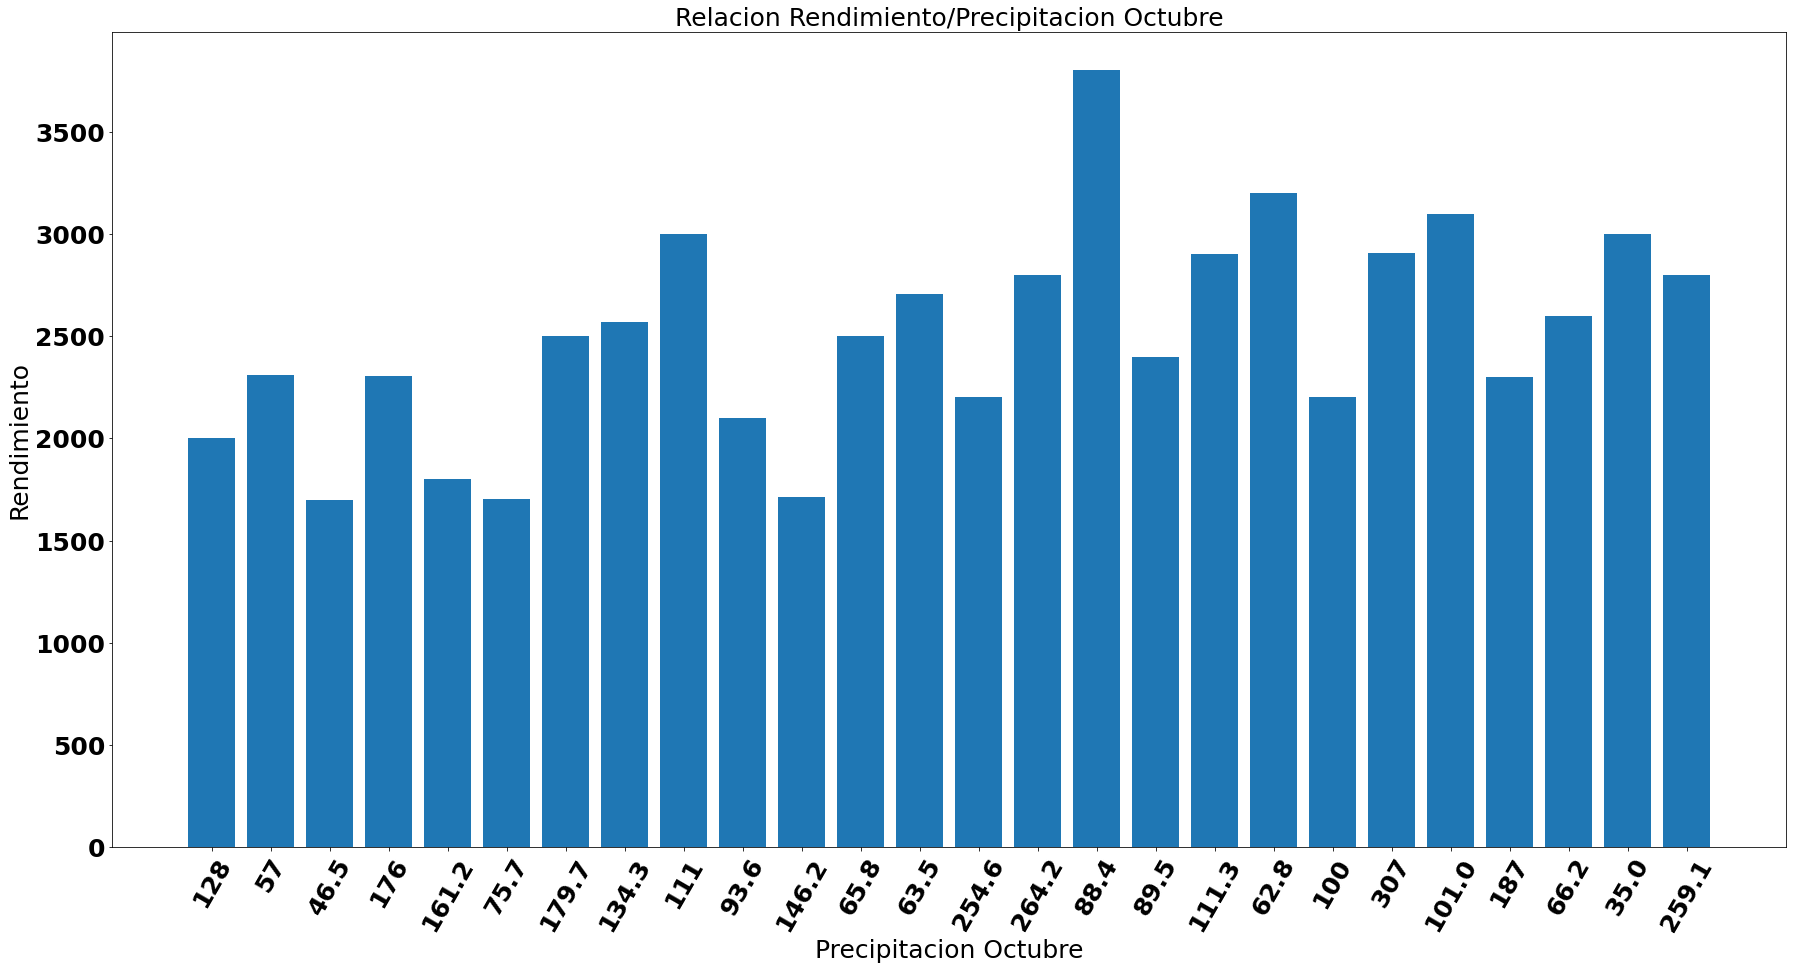

In [23]:


fig, ax = plt.subplots(figsize=(30,15))

ax.bar(df_definitivo["Precipitaciones Octubre"], df_definitivo['Rendimiento'])
ax.set_title('Relacion Rendimiento/Precipitacion Octubre', fontsize = 25)
ax.set_ylabel('Rendimiento', fontsize = 25)
ax.set_xlabel('Precipitacion Octubre', fontsize = 25)
plt.xticks(fontsize = 25, weight='bold')
plt.yticks(fontsize = 25, weight='bold')
plt.xticks(rotation = 60)


plt.show()

In [24]:
df_precip_noviembre = df_precip.loc[df_precip['fecha'].dt.month == 11]
df_precip_noviembre

,fecha,precipitacion
10,1988-11-30,36.0
22,1989-11-30,46.9
34,1990-11-30,193.7
46,1991-11-30,90.7
58,1992-11-30,145.6
70,1993-11-30,154.9
82,1994-11-30,48.5
94,1995-11-30,55.7
106,1996-11-30,198.0
118,1997-11-30,82.3


In [31]:
df_definitivo.loc[df_definitivo['Campaña'] == '1987/88', 'Precipitaciones Noviembre'] = '117.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '1988/89', 'Precipitaciones Noviembre'] = '36.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '1989/90', 'Precipitaciones Noviembre'] = '46.9' 
df_definitivo.loc[df_definitivo['Campaña'] == '1990/91', 'Precipitaciones Noviembre'] = '193.7' 
df_definitivo.loc[df_definitivo['Campaña'] == '1991/92', 'Precipitaciones Noviembre'] = '90.7' 
df_definitivo.loc[df_definitivo['Campaña'] == '1992/93', 'Precipitaciones Noviembre'] = '145.6' 
df_definitivo.loc[df_definitivo['Campaña'] == '1993/94', 'Precipitaciones Noviembre'] = '154.9' 
df_definitivo.loc[df_definitivo['Campaña'] == '1994/95', 'Precipitaciones Noviembre'] = '48.5' 
df_definitivo.loc[df_definitivo['Campaña'] == '1995/96', 'Precipitaciones Noviembre'] = '55.7' 
df_definitivo.loc[df_definitivo['Campaña'] == '1996/97', 'Precipitaciones Noviembre'] = '198.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '1997/98', 'Precipitaciones Noviembre'] = '82.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '1998/99', 'Precipitaciones Noviembre'] = '118.6' 
df_definitivo.loc[df_definitivo['Campaña'] == '1999/00', 'Precipitaciones Noviembre'] = '47.7' 
df_definitivo.loc[df_definitivo['Campaña'] == '2000/01', 'Precipitaciones Noviembre'] = '122.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2001/02', 'Precipitaciones Noviembre'] = '134.6' 
df_definitivo.loc[df_definitivo['Campaña'] == '2002/03', 'Precipitaciones Noviembre'] = '149.0'
df_definitivo.loc[df_definitivo['Campaña'] == '2003/04', 'Precipitaciones Noviembre'] = '126.5' 
df_definitivo.loc[df_definitivo['Campaña'] == '2004/05', 'Precipitaciones Noviembre'] = '111.9' 
df_definitivo.loc[df_definitivo['Campaña'] == '2005/06', 'Precipitaciones Noviembre'] = '119.4' 
df_definitivo.loc[df_definitivo['Campaña'] == '2006/07', 'Precipitaciones Noviembre'] = '67.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2007/08', 'Precipitaciones Noviembre'] = '109.8' 
df_definitivo.loc[df_definitivo['Campaña'] == '2008/09', 'Precipitaciones Noviembre'] = '63.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '2009/10', 'Precipitaciones Noviembre'] = '203.8' 
df_definitivo.loc[df_definitivo['Campaña'] == '2010/11', 'Precipitaciones Noviembre'] = '8.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '2011/12', 'Precipitaciones Noviembre'] = '131.8' 
df_definitivo.loc[df_definitivo['Campaña'] == '2012/13', 'Precipitaciones Noviembre'] = '167.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2013/14', 'Precipitaciones Noviembre'] = '195.2' 

In [26]:
df_definitivo

,Cultivo,Campaña,Provincia,Departamento,idProvincia,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento,Precipitaciones,Precipitaciones Septiembre,Precipitaciones Octubre,Precipitaciones Noviembre
5430,Girasol,1987/88,BUENOS AIRES,CHACABUCO,6,210,1000,1000.0,2000,2000.0,860,54.0,128,117.0
5431,Girasol,1988/89,BUENOS AIRES,CHACABUCO,6,210,1000,1000.0,2000,2000.0,"833,2",68.4,57,36.0
5432,Girasol,1989/90,BUENOS AIRES,CHACABUCO,6,210,5000,4000.0,5200,1300.0,"1111,4",20.3,46.5,46.9
5433,Girasol,1990/91,BUENOS AIRES,CHACABUCO,6,210,4900,4900.0,8800,1796.0,"1068,6",84.4,176,193.7
5434,Girasol,1991/92,BUENOS AIRES,CHACABUCO,6,210,5370,3870.0,5000,1292.0,"897,4",63.4,161.2,90.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7385,Girasol,2009/10,BUENOS AIRES,SALTO,6,714,1000,1000.0,2900,2900.0,"1396,3",145.1,111.3,203.8
7386,Girasol,2010/11,BUENOS AIRES,SALTO,6,714,800,800.0,2320,2900.0,"807,7",119.0,62.8,8.2
7387,Girasol,2011/12,BUENOS AIRES,SALTO,6,714,800,800.0,1520,1900.0,"982,5",45.8,100,131.8
7388,Girasol,2012/13,BUENOS AIRES,SALTO,6,714,650,650.0,1890,2908.0,"1282,4",90.0,307,167.0


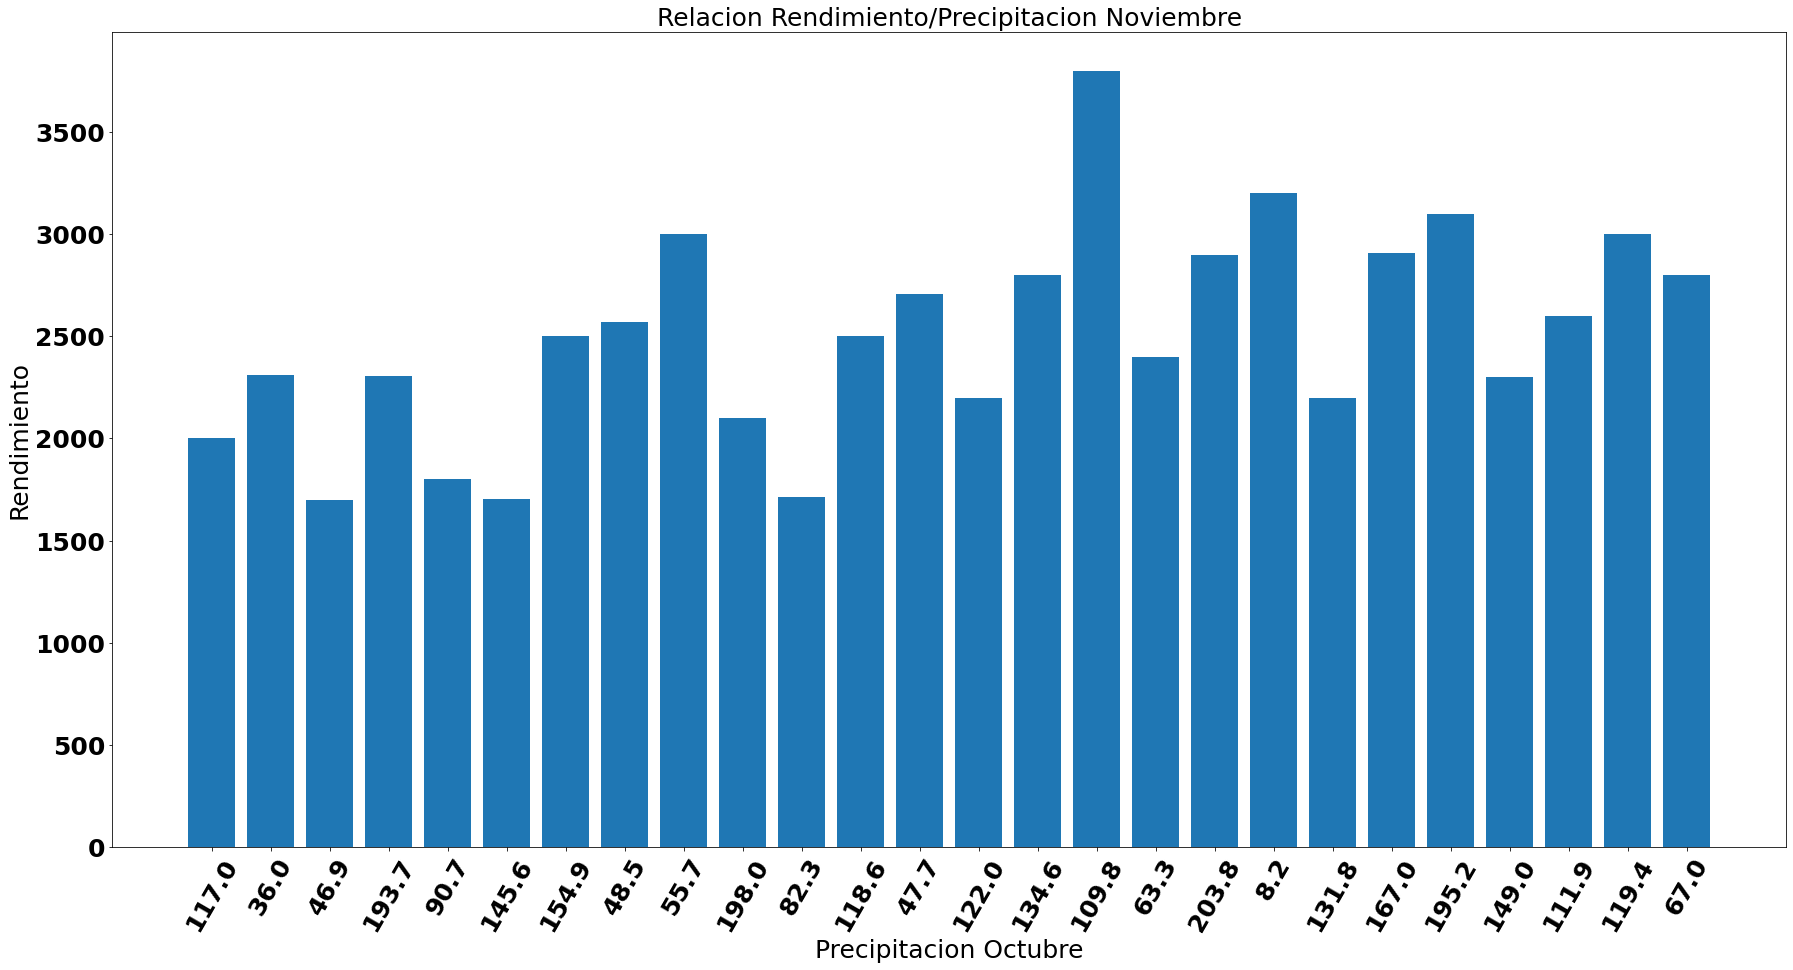

In [27]:


fig, ax = plt.subplots(figsize=(30,15))

ax.bar(df_definitivo["Precipitaciones Noviembre"], df_definitivo['Rendimiento'])
ax.set_title('Relacion Rendimiento/Precipitacion Noviembre', fontsize = 25)
ax.set_ylabel('Rendimiento', fontsize = 25)
ax.set_xlabel('Precipitacion Octubre', fontsize = 25)
plt.xticks(fontsize = 25, weight='bold')
plt.yticks(fontsize = 25, weight='bold')
plt.xticks(rotation = 60)


plt.show()

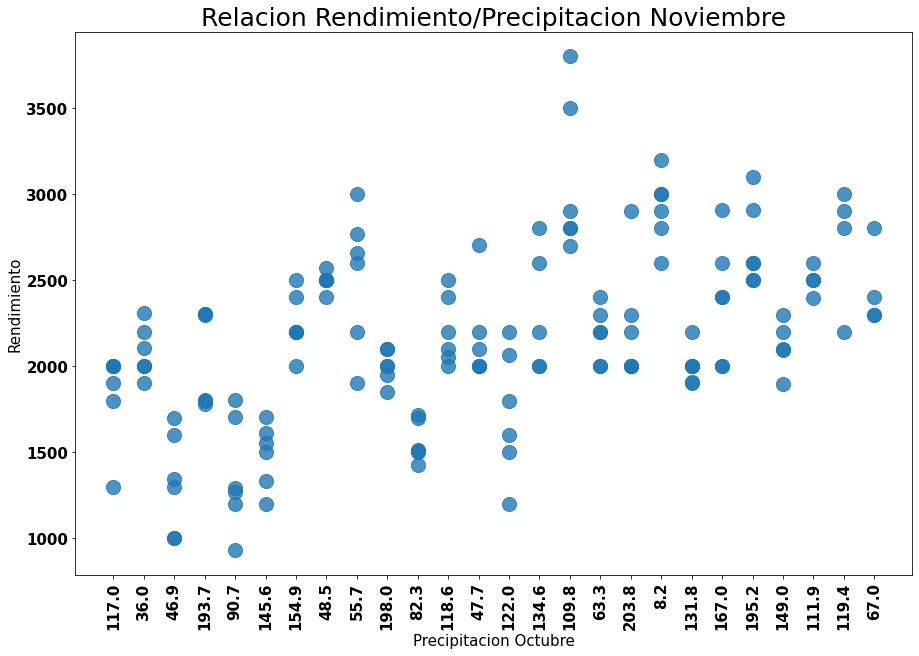

In [28]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(df_definitivo["Precipitaciones Noviembre"], df_definitivo['Rendimiento'], alpha=.8, s=200)
ax.set_title('Relacion Rendimiento/Precipitacion Noviembre', fontsize = 25)
ax.set_ylabel('Rendimiento', fontsize = 15)
ax.set_xlabel('Precipitacion Octubre', fontsize = 15)
plt.xticks(fontsize = 15, weight='bold')
plt.yticks(fontsize = 15, weight='bold')
plt.xticks(rotation = 90)

plt.show()

In [29]:
df_precip_diciembre = df_precip.loc[df_precip['fecha'].dt.month == 12]
df_precip_diciembre

,fecha,precipitacion
11,1988-12-31,82.8
23,1989-12-31,193.5
35,1990-12-31,91.4
47,1991-12-31,244.1
59,1992-12-31,90.6
71,1993-12-31,109.5
83,1994-12-31,122.0
95,1995-12-31,69.0
107,1996-12-31,195.6
119,1997-12-31,202.4


In [35]:
df_definitivo.loc[df_definitivo['Campaña'] == '1987/88', 'Precipitaciones Diciembre'] = '118.5' 
df_definitivo.loc[df_definitivo['Campaña'] == '1988/89', 'Precipitaciones Diciembre'] = '82.8' 
df_definitivo.loc[df_definitivo['Campaña'] == '1989/90', 'Precipitaciones Diciembre'] = '193.5' 
df_definitivo.loc[df_definitivo['Campaña'] == '1990/91', 'Precipitaciones Diciembre'] = '91.4' 
df_definitivo.loc[df_definitivo['Campaña'] == '1991/92', 'Precipitaciones Diciembre'] = '244.1' 
df_definitivo.loc[df_definitivo['Campaña'] == '1992/93', 'Precipitaciones Diciembre'] = '90.6' 
df_definitivo.loc[df_definitivo['Campaña'] == '1993/94', 'Precipitaciones Diciembre'] = '109.5' 
df_definitivo.loc[df_definitivo['Campaña'] == '1994/95', 'Precipitaciones Diciembre'] = '122.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '1995/96', 'Precipitaciones Diciembre'] = '69.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '1996/97', 'Precipitaciones Diciembre'] = '195.6' 
df_definitivo.loc[df_definitivo['Campaña'] == '1997/98', 'Precipitaciones Diciembre'] = '202.4' 
df_definitivo.loc[df_definitivo['Campaña'] == '1998/99', 'Precipitaciones Diciembre'] = '130.4' 
df_definitivo.loc[df_definitivo['Campaña'] == '1999/00', 'Precipitaciones Diciembre'] = '54.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '2000/01', 'Precipitaciones Diciembre'] = '14.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '2001/02', 'Precipitaciones Diciembre'] = '83.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '2002/03', 'Precipitaciones Diciembre'] = '169.0'
df_definitivo.loc[df_definitivo['Campaña'] == '2003/04', 'Precipitaciones Diciembre'] = '71.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2004/05', 'Precipitaciones Diciembre'] = '229.7' 
df_definitivo.loc[df_definitivo['Campaña'] == '2005/06', 'Precipitaciones Diciembre'] = '45.9' 
df_definitivo.loc[df_definitivo['Campaña'] == '2006/07', 'Precipitaciones Diciembre'] = '141.9' 
df_definitivo.loc[df_definitivo['Campaña'] == '2007/08', 'Precipitaciones Diciembre'] = '80.4' 
df_definitivo.loc[df_definitivo['Campaña'] == '2008/09', 'Precipitaciones Diciembre'] = '47.7' 
df_definitivo.loc[df_definitivo['Campaña'] == '2009/10', 'Precipitaciones Diciembre'] = '312.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '2010/11', 'Precipitaciones Diciembre'] = '49.4' 
df_definitivo.loc[df_definitivo['Campaña'] == '2011/12', 'Precipitaciones Diciembre'] = '1.1' 
df_definitivo.loc[df_definitivo['Campaña'] == '2012/13', 'Precipitaciones Diciembre'] = '150.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2013/14', 'Precipitaciones Diciembre'] = '61.3' 

In [36]:
df_definitivo

,Cultivo,Campaña,Provincia,Departamento,idProvincia,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento,Precipitaciones,Precipitaciones Septiembre,Precipitaciones Octubre,Precipitaciones Noviembre,Precipitaciones Diciembre
5430,Girasol,1987/88,BUENOS AIRES,CHACABUCO,6,210,1000,1000.0,2000,2000.0,860,54.0,128.0,117.0,118.5
5431,Girasol,1988/89,BUENOS AIRES,CHACABUCO,6,210,1000,1000.0,2000,2000.0,"833,2",68.4,57,36.0,82.8
5432,Girasol,1989/90,BUENOS AIRES,CHACABUCO,6,210,5000,4000.0,5200,1300.0,"1111,4",20.3,46.5,46.9,193.5
5433,Girasol,1990/91,BUENOS AIRES,CHACABUCO,6,210,4900,4900.0,8800,1796.0,"1068,6",84.4,176,193.7,91.4
5434,Girasol,1991/92,BUENOS AIRES,CHACABUCO,6,210,5370,3870.0,5000,1292.0,"897,4",63.4,161.2,90.7,244.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7385,Girasol,2009/10,BUENOS AIRES,SALTO,6,714,1000,1000.0,2900,2900.0,"1396,3",145.1,111.3,203.8,312.3
7386,Girasol,2010/11,BUENOS AIRES,SALTO,6,714,800,800.0,2320,2900.0,"807,7",119.0,62.8,8.2,49.4
7387,Girasol,2011/12,BUENOS AIRES,SALTO,6,714,800,800.0,1520,1900.0,"982,5",45.8,100,131.8,1.1
7388,Girasol,2012/13,BUENOS AIRES,SALTO,6,714,650,650.0,1890,2908.0,"1282,4",90.0,307,167.0,150.0


In [37]:
df_precip_enero = df_precip.loc[df_precip['fecha'].dt.month == 1]
df_precip_enero

,fecha,precipitacion
0,1988-01-31,56.2
12,1989-01-31,112.8
24,1990-01-31,178.7
36,1991-01-31,111.0
48,1992-01-31,115.1
60,1993-01-31,219.5
72,1994-01-31,51.8
84,1995-01-31,92.0
96,1996-01-31,66.8
108,1997-01-31,189.8


In [40]:
df_definitivo.loc[df_definitivo['Campaña'] == '1987/88', 'Precipitaciones Enero'] = '56.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '1988/89', 'Precipitaciones Enero'] = '112.8' 
df_definitivo.loc[df_definitivo['Campaña'] == '1989/90', 'Precipitaciones Enero'] = '178.7' 
df_definitivo.loc[df_definitivo['Campaña'] == '1990/91', 'Precipitaciones Enero'] = '111.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '1991/92', 'Precipitaciones Enero'] = '115.1' 
df_definitivo.loc[df_definitivo['Campaña'] == '1992/93', 'Precipitaciones Enero'] = '219.5' 
df_definitivo.loc[df_definitivo['Campaña'] == '1993/94', 'Precipitaciones Enero'] = '51.8' 
df_definitivo.loc[df_definitivo['Campaña'] == '1994/95', 'Precipitaciones Enero'] = '92.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '1995/96', 'Precipitaciones Enero'] = '66.8' 
df_definitivo.loc[df_definitivo['Campaña'] == '1996/97', 'Precipitaciones Enero'] = '189.8' 
df_definitivo.loc[df_definitivo['Campaña'] == '1997/98', 'Precipitaciones Enero'] = '91.7' 
df_definitivo.loc[df_definitivo['Campaña'] == '1998/99', 'Precipitaciones Enero'] = '127.9' 
df_definitivo.loc[df_definitivo['Campaña'] == '1999/00', 'Precipitaciones Enero'] = '57.1' 
df_definitivo.loc[df_definitivo['Campaña'] == '2000/01', 'Precipitaciones Enero'] = '279.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '2001/02', 'Precipitaciones Enero'] = '115.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '2002/03', 'Precipitaciones Enero'] = '57.7'
df_definitivo.loc[df_definitivo['Campaña'] == '2003/04', 'Precipitaciones Enero'] = '128.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '2004/05', 'Precipitaciones Enero'] = '173.9' 
df_definitivo.loc[df_definitivo['Campaña'] == '2005/06', 'Precipitaciones Enero'] = '211.8' 
df_definitivo.loc[df_definitivo['Campaña'] == '2006/07', 'Precipitaciones Enero'] = '111.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '2007/08', 'Precipitaciones Enero'] = '100.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2008/09', 'Precipitaciones Enero'] = '33.4' 
df_definitivo.loc[df_definitivo['Campaña'] == '2009/10', 'Precipitaciones Enero'] = '162.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2010/11', 'Precipitaciones Enero'] = '198.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '2011/12', 'Precipitaciones Enero'] = '188.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2012/13', 'Precipitaciones Enero'] = '28.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2013/14', 'Precipitaciones Enero'] = '188.1' 

,Cultivo,Campaña,Provincia,Departamento,idProvincia,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento,Precipitaciones,Precipitaciones Septiembre,Precipitaciones Octubre,Precipitaciones Noviembre,Precipitaciones Diciembre,Precipitaciones Enero
5430,Girasol,1987/88,BUENOS AIRES,CHACABUCO,6,210,1000,1000.0,2000,2000.0,860,54.0,128.0,117.0,118.5,56.2
5431,Girasol,1988/89,BUENOS AIRES,CHACABUCO,6,210,1000,1000.0,2000,2000.0,"833,2",68.4,57,36.0,82.8,112.8
5432,Girasol,1989/90,BUENOS AIRES,CHACABUCO,6,210,5000,4000.0,5200,1300.0,"1111,4",20.3,46.5,46.9,193.5,178.7
5433,Girasol,1990/91,BUENOS AIRES,CHACABUCO,6,210,4900,4900.0,8800,1796.0,"1068,6",84.4,176,193.7,91.4,111.0
5434,Girasol,1991/92,BUENOS AIRES,CHACABUCO,6,210,5370,3870.0,5000,1292.0,"897,4",63.4,161.2,90.7,244.1,115.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7385,Girasol,2009/10,BUENOS AIRES,SALTO,6,714,1000,1000.0,2900,2900.0,"1396,3",145.1,111.3,203.8,312.3,162.0
7386,Girasol,2010/11,BUENOS AIRES,SALTO,6,714,800,800.0,2320,2900.0,"807,7",119.0,62.8,8.2,49.4,198.3
7387,Girasol,2011/12,BUENOS AIRES,SALTO,6,714,800,800.0,1520,1900.0,"982,5",45.8,100,131.8,1.1,188.0
7388,Girasol,2012/13,BUENOS AIRES,SALTO,6,714,650,650.0,1890,2908.0,"1282,4",90.0,307,167.0,150.0,28.0


In [38]:
df_precip_enero.describe()

,precipitacion
count,27.000000
mean,127.618519
std,64.522280
min,28.000000
25%,79.250000
50%,115.100000
75%,183.350000
max,279.300000


In [41]:
df_precip_febrero = df_precip.loc[df_precip['fecha'].dt.month == 2]
df_precip_febrero

,fecha,precipitacion
1,1988-02-29,32.9
13,1989-02-28,130.2
25,1990-02-28,122.9
37,1991-02-28,93.8
49,1992-02-29,15.5
61,1993-02-28,30.7
73,1994-02-28,29.9
85,1995-02-28,53.1
97,1996-02-29,103.9
109,1997-02-28,55.9


In [43]:
df_definitivo.loc[df_definitivo['Campaña'] == '1987/88', 'Precipitaciones Febrero'] = '32.9' 
df_definitivo.loc[df_definitivo['Campaña'] == '1988/89', 'Precipitaciones Febrero'] = '130.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '1989/90', 'Precipitaciones Febrero'] = '122.9' 
df_definitivo.loc[df_definitivo['Campaña'] == '1990/91', 'Precipitaciones Febrero'] = '93.8' 
df_definitivo.loc[df_definitivo['Campaña'] == '1991/92', 'Precipitaciones Febrero'] = '15.5' 
df_definitivo.loc[df_definitivo['Campaña'] == '1992/93', 'Precipitaciones Febrero'] = '30.7' 
df_definitivo.loc[df_definitivo['Campaña'] == '1993/94', 'Precipitaciones Febrero'] = '29.9' 
df_definitivo.loc[df_definitivo['Campaña'] == '1994/95', 'Precipitaciones Febrero'] = '53.1' 
df_definitivo.loc[df_definitivo['Campaña'] == '1995/96', 'Precipitaciones Febrero'] = '103.9' 
df_definitivo.loc[df_definitivo['Campaña'] == '1996/97', 'Precipitaciones Febrero'] = '55.9' 
df_definitivo.loc[df_definitivo['Campaña'] == '1997/98', 'Precipitaciones Febrero'] = '169.1' 
df_definitivo.loc[df_definitivo['Campaña'] == '1998/99', 'Precipitaciones Febrero'] = '139.6' 
df_definitivo.loc[df_definitivo['Campaña'] == '1999/00', 'Precipitaciones Febrero'] = '134.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2000/01', 'Precipitaciones Febrero'] = '276.8' 
df_definitivo.loc[df_definitivo['Campaña'] == '2001/02', 'Precipitaciones Febrero'] = '44.6' 
df_definitivo.loc[df_definitivo['Campaña'] == '2002/03', 'Precipitaciones Febrero'] = '186.3'
df_definitivo.loc[df_definitivo['Campaña'] == '2003/04', 'Precipitaciones Febrero'] = '20.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2004/05', 'Precipitaciones Febrero'] = '46.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '2005/06', 'Precipitaciones Febrero'] = '91.1' 
df_definitivo.loc[df_definitivo['Campaña'] == '2006/07', 'Precipitaciones Febrero'] = '256.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2007/08', 'Precipitaciones Febrero'] = '161.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2008/09', 'Precipitaciones Febrero'] = '75.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '2009/10', 'Precipitaciones Febrero'] = '246.9' 
df_definitivo.loc[df_definitivo['Campaña'] == '2010/11', 'Precipitaciones Febrero'] = '123.5' 
df_definitivo.loc[df_definitivo['Campaña'] == '2011/12', 'Precipitaciones Febrero'] = '233.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '2012/13', 'Precipitaciones Febrero'] = '84.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2013/14', 'Precipitaciones Febrero'] = '210.5' 
df_definitivo

,Cultivo,Campaña,Provincia,Departamento,idProvincia,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento,Precipitaciones,Precipitaciones Septiembre,Precipitaciones Octubre,Precipitaciones Noviembre,Precipitaciones Diciembre,Precipitaciones Enero,Precipitaciones Febrero
5430,Girasol,1987/88,BUENOS AIRES,CHACABUCO,6,210,1000,1000.0,2000,2000.0,860,54.0,128.0,117.0,118.5,56.2,32.9
5431,Girasol,1988/89,BUENOS AIRES,CHACABUCO,6,210,1000,1000.0,2000,2000.0,"833,2",68.4,57,36.0,82.8,112.8,130.2
5432,Girasol,1989/90,BUENOS AIRES,CHACABUCO,6,210,5000,4000.0,5200,1300.0,"1111,4",20.3,46.5,46.9,193.5,178.7,122.9
5433,Girasol,1990/91,BUENOS AIRES,CHACABUCO,6,210,4900,4900.0,8800,1796.0,"1068,6",84.4,176,193.7,91.4,111.0,93.8
5434,Girasol,1991/92,BUENOS AIRES,CHACABUCO,6,210,5370,3870.0,5000,1292.0,"897,4",63.4,161.2,90.7,244.1,115.1,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7385,Girasol,2009/10,BUENOS AIRES,SALTO,6,714,1000,1000.0,2900,2900.0,"1396,3",145.1,111.3,203.8,312.3,162.0,246.9
7386,Girasol,2010/11,BUENOS AIRES,SALTO,6,714,800,800.0,2320,2900.0,"807,7",119.0,62.8,8.2,49.4,198.3,123.5
7387,Girasol,2011/12,BUENOS AIRES,SALTO,6,714,800,800.0,1520,1900.0,"982,5",45.8,100,131.8,1.1,188.0,233.3
7388,Girasol,2012/13,BUENOS AIRES,SALTO,6,714,650,650.0,1890,2908.0,"1282,4",90.0,307,167.0,150.0,28.0,84.0


In [45]:
df_precip_marzo = df_precip.loc[df_precip['fecha'].dt.month == 3]
df_precip_marzo

,fecha,precipitacion
2,1988-03-31,283.0
14,1989-03-31,174.3
26,1990-03-31,329.1
38,1991-03-31,115.9
50,1992-03-31,103.9
62,1993-03-31,137.9
74,1994-03-31,11.9
86,1995-03-31,94.4
98,1996-03-31,28.1
110,1997-03-31,77.9


In [47]:
df_definitivo.loc[df_definitivo['Campaña'] == '1987/88', 'Precipitaciones Marzo'] = '283.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '1988/89', 'Precipitaciones Marzo'] = '174.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '1989/90', 'Precipitaciones Marzo'] = '329.1' 
df_definitivo.loc[df_definitivo['Campaña'] == '1990/91', 'Precipitaciones Marzo'] = '115.9' 
df_definitivo.loc[df_definitivo['Campaña'] == '1991/92', 'Precipitaciones Marzo'] = '103.9' 
df_definitivo.loc[df_definitivo['Campaña'] == '1992/93', 'Precipitaciones Marzo'] = '137.9' 
df_definitivo.loc[df_definitivo['Campaña'] == '1993/94', 'Precipitaciones Marzo'] = '11.9' 
df_definitivo.loc[df_definitivo['Campaña'] == '1994/95', 'Precipitaciones Marzo'] = '94.4' 
df_definitivo.loc[df_definitivo['Campaña'] == '1995/96', 'Precipitaciones Marzo'] = '28.1' 
df_definitivo.loc[df_definitivo['Campaña'] == '1996/97', 'Precipitaciones Marzo'] = '77.9' 
df_definitivo.loc[df_definitivo['Campaña'] == '1997/98', 'Precipitaciones Marzo'] = '57.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '1998/99', 'Precipitaciones Marzo'] = '169.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '1999/00', 'Precipitaciones Marzo'] = '110.7' 
df_definitivo.loc[df_definitivo['Campaña'] == '2000/01', 'Precipitaciones Marzo'] = '321.8' 
df_definitivo.loc[df_definitivo['Campaña'] == '2001/02', 'Precipitaciones Marzo'] = '349.4' 
df_definitivo.loc[df_definitivo['Campaña'] == '2002/03', 'Precipitaciones Marzo'] = '134.0'
df_definitivo.loc[df_definitivo['Campaña'] == '2003/04', 'Precipitaciones Marzo'] = '54.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2004/05', 'Precipitaciones Marzo'] = '149.4' 
df_definitivo.loc[df_definitivo['Campaña'] == '2005/06', 'Precipitaciones Marzo'] = '97.8' 
df_definitivo.loc[df_definitivo['Campaña'] == '2006/07', 'Precipitaciones Marzo'] = '267.6' 
df_definitivo.loc[df_definitivo['Campaña'] == '2007/08', 'Precipitaciones Marzo'] = '177.5' 
df_definitivo.loc[df_definitivo['Campaña'] == '2008/09', 'Precipitaciones Marzo'] = '35.5' 
df_definitivo.loc[df_definitivo['Campaña'] == '2009/10', 'Precipitaciones Marzo'] = '81.5' 
df_definitivo.loc[df_definitivo['Campaña'] == '2010/11', 'Precipitaciones Marzo'] = '88.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '2011/12', 'Precipitaciones Marzo'] = '124.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2012/13', 'Precipitaciones Marzo'] = '279.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '2013/14', 'Precipitaciones Marzo'] = '118.6' 

In [48]:
df_precip_abril = df_precip.loc[df_precip['fecha'].dt.month == 4]
df_precip_abril

,fecha,precipitacion
3,1988-04-30,54.7
15,1989-04-30,79.0
27,1990-04-30,118.9
39,1991-04-30,155.2
51,1992-04-30,68.3
63,1993-04-30,355.6
75,1994-04-30,125.5
87,1995-04-30,296.0
99,1996-04-30,171.3
111,1997-04-30,70.8


In [50]:
df_definitivo.loc[df_definitivo['Campaña'] == '1987/88', 'Precipitaciones Abril'] = '54.7' 
df_definitivo.loc[df_definitivo['Campaña'] == '1988/89', 'Precipitaciones Abril'] = '79.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '1989/90', 'Precipitaciones Abril'] = '118.9' 
df_definitivo.loc[df_definitivo['Campaña'] == '1990/91', 'Precipitaciones Abril'] = '155.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '1991/92', 'Precipitaciones Abril'] = '68.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '1992/93', 'Precipitaciones Abril'] = '355.6' 
df_definitivo.loc[df_definitivo['Campaña'] == '1993/94', 'Precipitaciones Abril'] = '125.5' 
df_definitivo.loc[df_definitivo['Campaña'] == '1994/95', 'Precipitaciones Abril'] = '296.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '1995/96', 'Precipitaciones Abril'] = '171.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '1996/97', 'Precipitaciones Abril'] = '70.8' 
df_definitivo.loc[df_definitivo['Campaña'] == '1997/98', 'Precipitaciones Abril'] = '110.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '1998/99', 'Precipitaciones Abril'] = '38.6' 
df_definitivo.loc[df_definitivo['Campaña'] == '1999/00', 'Precipitaciones Abril'] = '142.7' 
df_definitivo.loc[df_definitivo['Campaña'] == '2000/01', 'Precipitaciones Abril'] = '85.8' 
df_definitivo.loc[df_definitivo['Campaña'] == '2001/02', 'Precipitaciones Abril'] = '65.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2002/03', 'Precipitaciones Abril'] = '147.0'
df_definitivo.loc[df_definitivo['Campaña'] == '2003/04', 'Precipitaciones Abril'] = '134.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2004/05', 'Precipitaciones Abril'] = '44.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2005/06', 'Precipitaciones Abril'] = '138.5' 
df_definitivo.loc[df_definitivo['Campaña'] == '2006/07', 'Precipitaciones Abril'] = '50.9' 
df_definitivo.loc[df_definitivo['Campaña'] == '2007/08', 'Precipitaciones Abril'] = '1.8' 
df_definitivo.loc[df_definitivo['Campaña'] == '2008/09', 'Precipitaciones Abril'] = '112.7' 
df_definitivo.loc[df_definitivo['Campaña'] == '2009/10', 'Precipitaciones Abril'] = '45.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2010/11', 'Precipitaciones Abril'] = '98.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2011/12', 'Precipitaciones Abril'] = '36.5' 
df_definitivo.loc[df_definitivo['Campaña'] == '2012/13', 'Precipitaciones Abril'] = '51.1' 
df_definitivo.loc[df_definitivo['Campaña'] == '2013/14', 'Precipitaciones Abril'] = '188.3' 

In [51]:
df_precip_mayo = df_precip.loc[df_precip['fecha'].dt.month == 5]
df_precip_mayo

,fecha,precipitacion
4,1988-05-31,0.5
16,1989-05-31,93.0
28,1990-05-31,54.6
40,1991-05-31,47.2
52,1992-05-31,35.2
64,1993-05-31,104.3
76,1994-05-31,71.5
88,1995-05-31,54.6
100,1996-05-31,35.6
112,1997-05-31,48.9


In [53]:
df_definitivo.loc[df_definitivo['Campaña'] == '1987/88', 'Precipitaciones Mayo'] = '0.5' 
df_definitivo.loc[df_definitivo['Campaña'] == '1988/89', 'Precipitaciones Mayo'] = '93.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '1989/90', 'Precipitaciones Mayo'] = '54.6' 
df_definitivo.loc[df_definitivo['Campaña'] == '1990/91', 'Precipitaciones Mayo'] = '47.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '1991/92', 'Precipitaciones Mayo'] = '35.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '1992/93', 'Precipitaciones Mayo'] = '104.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '1993/94', 'Precipitaciones Mayo'] = '71.5' 
df_definitivo.loc[df_definitivo['Campaña'] == '1994/95', 'Precipitaciones Mayo'] = '54.6' 
df_definitivo.loc[df_definitivo['Campaña'] == '1995/96', 'Precipitaciones Mayo'] = '35.6' 
df_definitivo.loc[df_definitivo['Campaña'] == '1996/97', 'Precipitaciones Mayo'] = '48.9' 
df_definitivo.loc[df_definitivo['Campaña'] == '1997/98', 'Precipitaciones Mayo'] = '93.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '1998/99', 'Precipitaciones Mayo'] = '9.9' 
df_definitivo.loc[df_definitivo['Campaña'] == '1999/00', 'Precipitaciones Mayo'] = '307.1' 
df_definitivo.loc[df_definitivo['Campaña'] == '2000/01', 'Precipitaciones Mayo'] = '59.4' 
df_definitivo.loc[df_definitivo['Campaña'] == '2001/02', 'Precipitaciones Mayo'] = '118.6' 
df_definitivo.loc[df_definitivo['Campaña'] == '2002/03', 'Precipitaciones Mayo'] = '52.9'
df_definitivo.loc[df_definitivo['Campaña'] == '2003/04', 'Precipitaciones Mayo'] = '93.5' 
df_definitivo.loc[df_definitivo['Campaña'] == '2004/05', 'Precipitaciones Mayo'] = '5.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '2005/06', 'Precipitaciones Mayo'] = '9.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2006/07', 'Precipitaciones Mayo'] = '52.6' 
df_definitivo.loc[df_definitivo['Campaña'] == '2007/08', 'Precipitaciones Mayo'] = '0.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2008/09', 'Precipitaciones Mayo'] = '24.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '2009/10', 'Precipitaciones Mayo'] = '88.4' 
df_definitivo.loc[df_definitivo['Campaña'] == '2010/11', 'Precipitaciones Mayo'] = '60.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '2011/12', 'Precipitaciones Mayo'] = '122.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2012/13', 'Precipitaciones Mayo'] = '126.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2013/14', 'Precipitaciones Mayo'] = '130.8' 

In [54]:
df_precip_junio = df_precip.loc[df_precip['fecha'].dt.month == 6]
df_precip_junio

,fecha,precipitacion
5,1988-06-30,11.6
17,1989-06-30,49.2
29,1990-06-30,0.4
41,1991-06-30,75.2
53,1992-06-30,51.9
65,1993-06-30,109.8
77,1994-06-30,74.0
89,1995-06-30,19.5
101,1996-06-30,1.0
113,1997-06-30,69.1


In [56]:
df_definitivo.loc[df_definitivo['Campaña'] == '1987/88', 'Precipitaciones Junio'] = '11.6' 
df_definitivo.loc[df_definitivo['Campaña'] == '1988/89', 'Precipitaciones Junio'] = '49.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '1989/90', 'Precipitaciones Junio'] = '0.4' 
df_definitivo.loc[df_definitivo['Campaña'] == '1990/91', 'Precipitaciones Junio'] = '75.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '1991/92', 'Precipitaciones Junio'] = '51.9' 
df_definitivo.loc[df_definitivo['Campaña'] == '1992/93', 'Precipitaciones Junio'] = '109.8' 
df_definitivo.loc[df_definitivo['Campaña'] == '1993/94', 'Precipitaciones Junio'] = '74.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '1994/95', 'Precipitaciones Junio'] = '19.5' 
df_definitivo.loc[df_definitivo['Campaña'] == '1995/96', 'Precipitaciones Junio'] = '1.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '1996/97', 'Precipitaciones Junio'] = '69.1' 
df_definitivo.loc[df_definitivo['Campaña'] == '1997/98', 'Precipitaciones Junio'] = '3.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '1998/99', 'Precipitaciones Junio'] = '16.8' 
df_definitivo.loc[df_definitivo['Campaña'] == '1999/00', 'Precipitaciones Junio'] = '23.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2000/01', 'Precipitaciones Junio'] = '17.7' 
df_definitivo.loc[df_definitivo['Campaña'] == '2001/02', 'Precipitaciones Junio'] = '3.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2002/03', 'Precipitaciones Junio'] = '19.1'
df_definitivo.loc[df_definitivo['Campaña'] == '2003/04', 'Precipitaciones Junio'] = '1.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2004/05', 'Precipitaciones Junio'] = '7.4' 
df_definitivo.loc[df_definitivo['Campaña'] == '2005/06', 'Precipitaciones Junio'] = '46.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2006/07', 'Precipitaciones Junio'] = '16.4' 
df_definitivo.loc[df_definitivo['Campaña'] == '2007/08', 'Precipitaciones Junio'] = '26.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2008/09', 'Precipitaciones Junio'] = '3.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2009/10', 'Precipitaciones Junio'] = '42.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2010/11', 'Precipitaciones Junio'] = '31.4' 
df_definitivo.loc[df_definitivo['Campaña'] == '2011/12', 'Precipitaciones Junio'] = '10.5' 
df_definitivo.loc[df_definitivo['Campaña'] == '2012/13', 'Precipitaciones Junio'] = '18.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2013/14', 'Precipitaciones Junio'] = '64.0' 

In [57]:
df_precip_julio = df_precip.loc[df_precip['fecha'].dt.month == 7]
df_precip_julio

,fecha,precipitacion
6,1988-07-31,36.5
18,1989-07-31,31.3
30,1990-07-31,32.5
42,1991-07-31,32.2
54,1992-07-31,14.2
66,1993-07-31,3.3
78,1994-07-31,36.0
90,1995-07-31,18.1
102,1996-07-31,12.2
114,1997-07-31,12.8


In [59]:
df_definitivo.loc[df_definitivo['Campaña'] == '1987/88', 'Precipitaciones Julio'] = '36.5' 
df_definitivo.loc[df_definitivo['Campaña'] == '1988/89', 'Precipitaciones Julio'] = '31.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '1989/90', 'Precipitaciones Julio'] = '32.5' 
df_definitivo.loc[df_definitivo['Campaña'] == '1990/91', 'Precipitaciones Julio'] = '32.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '1991/92', 'Precipitaciones Julio'] = '14.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '1992/93', 'Precipitaciones Julio'] = '3.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '1993/94', 'Precipitaciones Julio'] = '36.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '1994/95', 'Precipitaciones Julio'] = '18.1' 
df_definitivo.loc[df_definitivo['Campaña'] == '1995/96', 'Precipitaciones Julio'] = '12.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '1996/97', 'Precipitaciones Julio'] = '12.8' 
df_definitivo.loc[df_definitivo['Campaña'] == '1997/98', 'Precipitaciones Julio'] = '36.4' 
df_definitivo.loc[df_definitivo['Campaña'] == '1998/99', 'Precipitaciones Julio'] = '14.6' 
df_definitivo.loc[df_definitivo['Campaña'] == '1999/00', 'Precipitaciones Julio'] = '1.8' 
df_definitivo.loc[df_definitivo['Campaña'] == '2000/01', 'Precipitaciones Julio'] = '18.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2001/02', 'Precipitaciones Julio'] = '17.6' 
df_definitivo.loc[df_definitivo['Campaña'] == '2002/03', 'Precipitaciones Julio'] = '98.1'
df_definitivo.loc[df_definitivo['Campaña'] == '2003/04', 'Precipitaciones Julio'] = '44.1' 
df_definitivo.loc[df_definitivo['Campaña'] == '2004/05', 'Precipitaciones Julio'] = '40.7' 
df_definitivo.loc[df_definitivo['Campaña'] == '2005/06', 'Precipitaciones Julio'] = '23.1' 
df_definitivo.loc[df_definitivo['Campaña'] == '2006/07', 'Precipitaciones Julio'] = '3.6' 
df_definitivo.loc[df_definitivo['Campaña'] == '2007/08', 'Precipitaciones Julio'] = '36.9' 
df_definitivo.loc[df_definitivo['Campaña'] == '2008/09', 'Precipitaciones Julio'] = '114.8' 
df_definitivo.loc[df_definitivo['Campaña'] == '2009/10', 'Precipitaciones Julio'] = '38.9' 
df_definitivo.loc[df_definitivo['Campaña'] == '2010/11', 'Precipitaciones Julio'] = '29.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2011/12', 'Precipitaciones Julio'] = '1.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2012/13', 'Precipitaciones Julio'] = '40.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '2013/14', 'Precipitaciones Julio'] = '17.0' 

In [60]:
df_precip_agosto = df_precip.loc[df_precip['fecha'].dt.month == 8]
df_precip_agosto

,fecha,precipitacion
7,1988-08-31,2.0
19,1989-08-31,35.5
31,1990-08-31,29.8
43,1991-08-31,62.7
55,1992-08-31,93.2
67,1993-08-31,30.4
79,1994-08-31,33.0
91,1995-08-31,0.3
103,1996-08-31,41.5
115,1997-08-31,8.1


In [63]:
df_definitivo.loc[df_definitivo['Campaña'] == '1987/88', 'Precipitaciones Agosto'] = '35.4' 
df_definitivo.loc[df_definitivo['Campaña'] == '1988/89', 'Precipitaciones Agosto'] = '2.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '1989/90', 'Precipitaciones Agosto'] = '35.5' 
df_definitivo.loc[df_definitivo['Campaña'] == '1990/91', 'Precipitaciones Agosto'] = '29.8' 
df_definitivo.loc[df_definitivo['Campaña'] == '1991/92', 'Precipitaciones Agosto'] = '62.7' 
df_definitivo.loc[df_definitivo['Campaña'] == '1992/93', 'Precipitaciones Agosto'] = '93.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '1993/94', 'Precipitaciones Agosto'] = '30.4' 
df_definitivo.loc[df_definitivo['Campaña'] == '1994/95', 'Precipitaciones Agosto'] = '33.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '1995/96', 'Precipitaciones Agosto'] = '0.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '1996/97', 'Precipitaciones Agosto'] = '41.5' 
df_definitivo.loc[df_definitivo['Campaña'] == '1997/98', 'Precipitaciones Agosto'] = '8.1' 
df_definitivo.loc[df_definitivo['Campaña'] == '1998/99', 'Precipitaciones Agosto'] = '9.6' 
df_definitivo.loc[df_definitivo['Campaña'] == '1999/00', 'Precipitaciones Agosto'] = '34.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2000/01', 'Precipitaciones Agosto'] = '14.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2001/02', 'Precipitaciones Agosto'] = '135.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2002/03', 'Precipitaciones Agosto'] = '82.0'
df_definitivo.loc[df_definitivo['Campaña'] == '2003/04', 'Precipitaciones Agosto'] = '21.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '2004/05', 'Precipitaciones Agosto'] = '67.5' 
df_definitivo.loc[df_definitivo['Campaña'] == '2005/06', 'Precipitaciones Agosto'] = '88.6' 
df_definitivo.loc[df_definitivo['Campaña'] == '2006/07', 'Precipitaciones Agosto'] = '0.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2007/08', 'Precipitaciones Agosto'] = '1.2' 
df_definitivo.loc[df_definitivo['Campaña'] == '2008/09', 'Precipitaciones Agosto'] = '3.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2009/10', 'Precipitaciones Agosto'] = '14.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '2010/11', 'Precipitaciones Agosto'] = '2.3' 
df_definitivo.loc[df_definitivo['Campaña'] == '2011/12', 'Precipitaciones Agosto'] = '10.0' 
df_definitivo.loc[df_definitivo['Campaña'] == '2012/13', 'Precipitaciones Agosto'] = '131.9' 
df_definitivo.loc[df_definitivo['Campaña'] == '2013/14', 'Precipitaciones Agosto'] = '0.0' 